# Plotting

We start by loading the iris data set.

In [3]:
import pandas as pd

filename = "complete.csv" 

df = pd.read_csv(filename)
df.head() # Jupyter Notebook will format this nicely if it's the last thing that I call

,ID,name,full_name,club,club_logo,special,age,league,birth_date,height_cm,...,prefers_cb,prefers_lb,prefers_lwb,prefers_ls,prefers_lf,prefers_lam,prefers_lcm,prefers_ldm,prefers_lcb,prefers_gk
0,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,Real Madrid CF,https://cdn.sofifa.org/18/teams/243.png,2228,32,Spanish Primera División,1985-02-05,185.0,...,False,False,False,False,False,False,False,False,False,False
1,158023,L. Messi,Lionel Messi,FC Barcelona,https://cdn.sofifa.org/18/teams/241.png,2158,30,Spanish Primera División,1987-06-24,170.0,...,False,False,False,False,False,False,False,False,False,False
2,190871,Neymar,Neymar da Silva Santos Jr.,Paris Saint-Germain,https://cdn.sofifa.org/18/teams/73.png,2100,25,French Ligue 1,1992-02-05,175.0,...,False,False,False,False,False,False,False,False,False,False
3,176580,L. Suárez,Luis Suárez,FC Barcelona,https://cdn.sofifa.org/18/teams/241.png,2291,30,Spanish Primera División,1987-01-24,182.0,...,False,False,False,False,False,False,False,False,False,False
4,167495,M. Neuer,Manuel Neuer,FC Bayern Munich,https://cdn.sofifa.org/18/teams/21.png,1493,31,German Bundesliga,1986-03-27,193.0,...,False,False,False,False,False,False,False,False,False,True


Lets see a full list of our column names.

In [4]:
print df.columns.values

['ID' 'name' 'full_name' 'club' 'club_logo' 'special' 'age' 'league'
 'birth_date' 'height_cm' 'weight_kg' 'body_type' 'real_face' 'flag'
 'nationality' 'photo' 'eur_value' 'eur_wage' 'eur_release_clause'
 'overall' 'potential' 'pac' 'sho' 'pas' 'dri' 'def' 'phy'
 'international_reputation' 'skill_moves' 'weak_foot' 'work_rate_att'
 'work_rate_def' 'preferred_foot' 'crossing' 'finishing' 'heading_accuracy'
 'short_passing' 'volleys' 'dribbling' 'curve' 'free_kick_accuracy'
 'long_passing' 'ball_control' 'acceleration' 'sprint_speed' 'agility'
 'reactions' 'balance' 'shot_power' 'jumping' 'stamina' 'strength'
 'long_shots' 'aggression' 'interceptions' 'positioning' 'vision'
 'penalties' 'composure' 'marking' 'standing_tackle' 'sliding_tackle'
 'gk_diving' 'gk_handling' 'gk_kicking' 'gk_positioning' 'gk_reflexes' 'rs'
 'rw' 'rf' 'ram' 'rcm' 'rm' 'rdm' 'rcb' 'rb' 'rwb' 'st' 'lw' 'cf' 'cam'
 'cm' 'lm' 'cdm' 'cb' 'lb' 'lwb' 'ls' 'lf' 'lam' 'lcm' 'ldm' 'lcb' 'gk'
 '1_on_1_rush_trait' 'acroba

Lets have a look if there is a correlation between "heading_accuracy" and "free_kick_accuracy"

We're going to need the PyPlot portion of MatPlotLib.

In [5]:
import matplotlib.pyplot as plt

Now lets plot two arbitrary columns against each other, namely: "Sepal Length" and "Petal Length.

We start by assigning these two columns to variables.

In [6]:
xaxis = 'ball_control'
yaxis = 'balance'

Now we set the properties of the graph we want to draw.

Starting with it's dimensions (size).

In [7]:
plt.figure(figsize=(9,9))

This kind of function call doesn't produce an output, but memeory has been allocated.

Jupyter Notebook is just informing us of this.

Next, we set the graph type, in this case a scatter plot with our two axes.

s=20 determines the size of the dots on the graph

alpha=0.5 determines the opacity of the dots on the graph 

In [8]:
plt.scatter(df[xaxis],df[yaxis], s=20, alpha=0.5)

We add our labels, and a grid.

In [9]:
plt.xlabel(xaxis)
plt.ylabel(yaxis)
plt.grid(True)

Finally we render the graph.

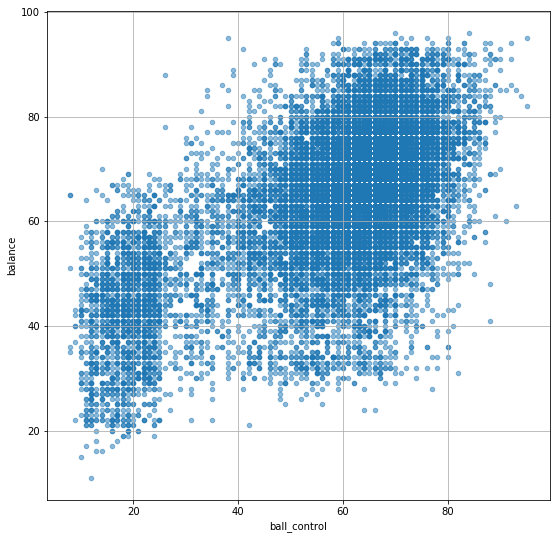

In [10]:
plt.show()

Lets try a KMeans clustering technique on these attributes

In [11]:
import numpy as np
import pylab as pl
from sklearn.cluster import KMeans

In [12]:
X = np.column_stack((df[xaxis], df[yaxis]))

kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
y_kmeans = kmeans.predict(X)

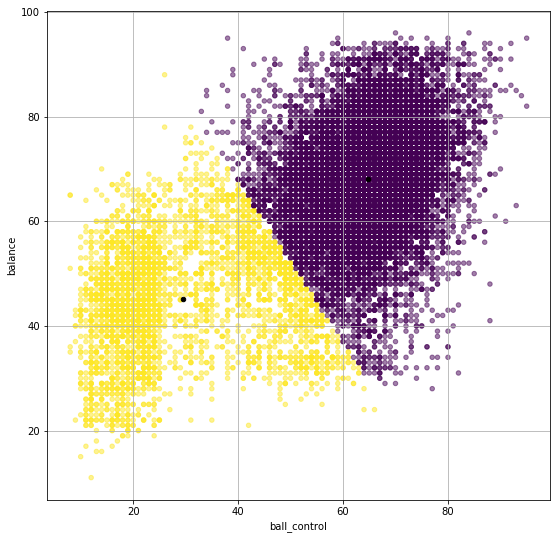

In [13]:
plt.figure(figsize=(9,9))
plt.xlabel(xaxis)
plt.ylabel(yaxis)
plt.grid(True)

plt.scatter(df[xaxis],df[yaxis], c=y_kmeans, s=20, alpha=0.5)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=20, alpha=1);
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=5, random_state=0, n_jobs=4).fit(X)
y_kmeans = kmeans.predict(X)

plt.figure(figsize=(9,9))
plt.xlabel(xaxis)
plt.ylabel(yaxis)
plt.grid(True)

plt.scatter(df[xaxis],df[yaxis], c=y_kmeans, s=20, alpha=0.5)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=20, alpha=1);
plt.show()

In [36]:
# Plot the decision boundary. For that, we will asign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
x_min, x_max = X[:,0].min() - .5, X[:,0].max() + .5
y_min, y_max = X[:,1].min() - .5, X[:,1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
print "DONE!"

DONE!


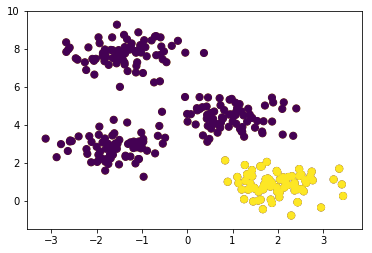